In [1]:
from pandas_datareader import data, wb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
from datetime import datetime

In [77]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [78]:
init_notebook_mode(connected=True)

In [79]:
cf.go_offline()

In [2]:
%matplotlib inline

In [3]:
start_date = '2006-01-01'
end_date = '2016-01-01'
df1 = data.DataReader('AAPL', data_source='yahoo', start=start_date, end=end_date)

In [4]:
df2 = data.DataReader('MSFT', data_source='yahoo', start=start_date, end=end_date)

In [5]:
df3 = data.DataReader('^GSPC', data_source='yahoo', start=start_date, end=end_date)

In [7]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,10.678572,10.321428,10.340000,10.678572,201808600.0,9.319328
2006-01-04,10.854285,10.642858,10.732857,10.710000,154900900.0,9.346760
2006-01-05,10.700000,10.535714,10.690000,10.625714,112355600.0,9.273201
2006-01-06,10.957143,10.650000,10.750000,10.900000,176114400.0,9.512576
2006-01-09,11.028571,10.820000,10.961429,10.864285,168760200.0,9.481407


In [8]:
tickers = ['AAPL', 'MSFT', '^GSPC']

In [9]:
bank_stocks= pd.concat([df1,df2,df3] ,keys=tickers,axis=1)

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker       AAPL                                                \
Stock Info        High        Low       Open      Close       Volume   
Date                                                                   
2006-01-03   10.678572  10.321428  10.340000  10.678572  201808600.0   
2006-01-04   10.854285  10.642858  10.732857  10.710000  154900900.0   
2006-01-05   10.700000  10.535714  10.690000  10.625714  112355600.0   
2006-01-06   10.957143  10.650000  10.750000  10.900000  176114400.0   
2006-01-09   11.028571  10.820000  10.961429  10.864285  168760200.0   

Bank Ticker                 MSFT                                            \
Stock Info  Adj Close       High    Low       Open      Close       Volume   
Date                                                                         
2006-01-03   9.319328  27.000000  26.10  26.250000  26.840000   79973000.0   
2006-01-04   9.346760  27.080000  26.77  26.770000  26.969999   57975600.0   
2006-01-05   9.273201  27.129999  26.91  26.959999  26.990000   48245500.0   
2006-01-06   9.512576  27.000000  26.49  26.889999  26.910000  100963000.0   
2006-01-09   9.481407  27.070000  26.76  26.930000  26.860001   55625000.0   

Bank Ticker                   ^GSPC                                         \
Stock Info   Adj Close         High          Low         Open        Close   
Date                                                                         
2006-01-03   19.777893  1270.219971  1245.739990  1248.290039  1268.800049   
2006-01-04   19.873684  1275.369995  1267.739990  1268.800049  1273.459961   
2006-01-05   19.888428  1276.910034  1270.300049  1273.459961  1273.479980   
2006-01-06   19.829477  1286.089966  1273.479980  1273.479980  1285.449951   
2006-01-09   19.792625  1290.780029  1284.819946  1285.449951  1290.150024   

Bank Ticker                           
Stock Info       Volume    Adj Close  
Date                                  
2006-01-03   2554570000  1268.800049  
2006-01-04   2515330000  1273.459961  
2006-01-05   2433340000  1273.479980  
2006-01-06   2446560000  1285.449951  
2006-01-09   2301490000  1290.150024

In [12]:
bank_stocks.xs(axis=1,key='Close',level='Stock Info').max()

Bank Ticker
AAPL      133.000000
MSFT       56.549999
^GSPC    2130.820068
dtype: float64

In [13]:
returns = pd.DataFrame()

In [14]:
for tick in tickers:
    returns[tick+'Return'] = bank_stocks[tick]['Close'].pct_change()

In [15]:
returns.head()

,AAPLReturn,MSFTReturn,^GSPCReturn
Date,,,
2006-01-03,NaN,NaN,NaN
2006-01-04,0.002943,0.004843,0.003673
2006-01-05,-0.007870,0.000742,0.000016
2006-01-06,0.025813,-0.002964,0.009399
2006-01-09,-0.003277,-0.001858,0.003656


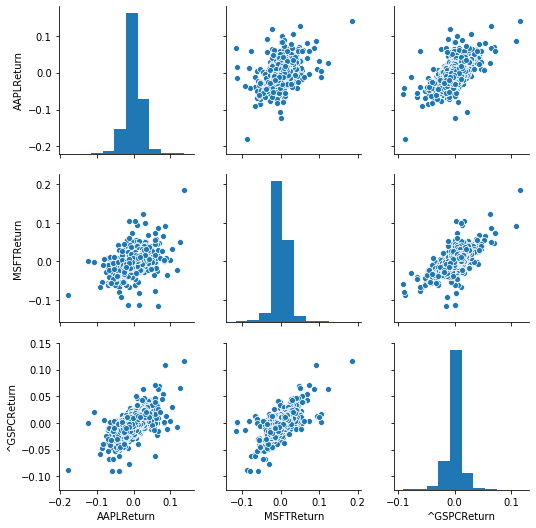

In [16]:
sns.pairplot(returns[1:])

In [17]:
returns.idxmin()

AAPLReturn    2008-09-29
MSFTReturn    2009-01-22
^GSPCReturn   2008-10-15
dtype: datetime64[ns]

In [18]:
returns.idxmax()

AAPLReturn    2008-10-13
MSFTReturn    2008-10-13
^GSPCReturn   2008-10-13
dtype: datetime64[ns]

In [19]:
returns[returns['AAPLReturn'] == returns['AAPLReturn'].max()]['AAPLReturn']  

Date
2008-10-13    0.13905
Name: AAPLReturn, dtype: float64

In [21]:
returns.std()

AAPLReturn     0.021599
MSFTReturn     0.017764
^GSPCReturn    0.013073
dtype: float64

In [22]:
returns.loc['2015-01-01':'2015-12-31'].std()

AAPLReturn     0.016841
MSFTReturn     0.017801
^GSPCReturn    0.009760
dtype: float64

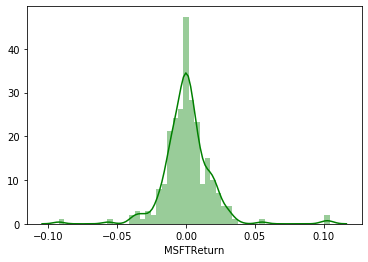

In [23]:
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSFTReturn'],color='green',bins=50)

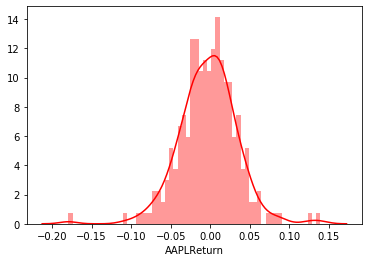

In [24]:
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['AAPLReturn'],bins=60,color='red')

In [25]:
sns.set_style('whitegrid')

In [26]:
bank_stocks.head()

Bank Ticker       AAPL                                                \
Stock Info        High        Low       Open      Close       Volume   
Date                                                                   
2006-01-03   10.678572  10.321428  10.340000  10.678572  201808600.0   
2006-01-04   10.854285  10.642858  10.732857  10.710000  154900900.0   
2006-01-05   10.700000  10.535714  10.690000  10.625714  112355600.0   
2006-01-06   10.957143  10.650000  10.750000  10.900000  176114400.0   
2006-01-09   11.028571  10.820000  10.961429  10.864285  168760200.0   

Bank Ticker                 MSFT                                            \
Stock Info  Adj Close       High    Low       Open      Close       Volume   
Date                                                                         
2006-01-03   9.319328  27.000000  26.10  26.250000  26.840000   79973000.0   
2006-01-04   9.346760  27.080000  26.77  26.770000  26.969999   57975600.0   
2006-01-05   9.273201  27.129999  26.91  26.959999  26.990000   48245500.0   
2006-01-06   9.512576  27.000000  26.49  26.889999  26.910000  100963000.0   
2006-01-09   9.481407  27.070000  26.76  26.930000  26.860001   55625000.0   

Bank Ticker                   ^GSPC                                         \
Stock Info   Adj Close         High          Low         Open        Close   
Date                                                                         
2006-01-03   19.777893  1270.219971  1245.739990  1248.290039  1268.800049   
2006-01-04   19.873684  1275.369995  1267.739990  1268.800049  1273.459961   
2006-01-05   19.888428  1276.910034  1270.300049  1273.459961  1273.479980   
2006-01-06   19.829477  1286.089966  1273.479980  1273.479980  1285.449951   
2006-01-09   19.792625  1290.780029  1284.819946  1285.449951  1290.150024   

Bank Ticker                           
Stock Info       Volume    Adj Close  
Date                                  
2006-01-03   2554570000  1268.800049  
2006-01-04   2515330000  1273.459961  
2006-01-05   2433340000  1273.479980  
2006-01-06   2446560000  1285.449951  
2006-01-09   2301490000  1290.150024

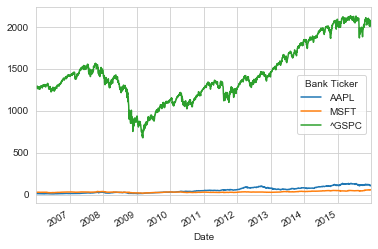

In [49]:
bank_stocks.xs(axis=1,key='Close',level='Stock Info').plot()

In [81]:
bank_stocks.xs(axis=1,key='Close',level='Stock Info').iplot()

In [33]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,10.678572,10.321428,10.340000,10.678572,201808600.0,9.319328
2006-01-04,10.854285,10.642858,10.732857,10.710000,154900900.0,9.346760
2006-01-05,10.700000,10.535714,10.690000,10.625714,112355600.0,9.273201
2006-01-06,10.957143,10.650000,10.750000,10.900000,176114400.0,9.512576
2006-01-09,11.028571,10.820000,10.961429,10.864285,168760200.0,9.481407


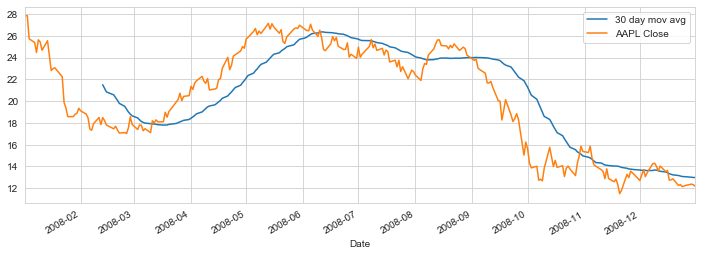

In [50]:
plt.figure(figsize=(12,4))
df1['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day mov avg')
df1['Close'].loc['2008-01-01':'2009-01-01'].plot(label='AAPL Close')
plt.legend()


In [55]:
bank_stocks.xs(axis=1,key='Close',level='Stock Info').corr()

Bank Ticker,AAPL,MSFT,^GSPC
Bank Ticker,,,
AAPL,1.000000,0.799511,0.789891
MSFT,0.799511,1.000000,0.928953
^GSPC,0.789891,0.928953,1.000000


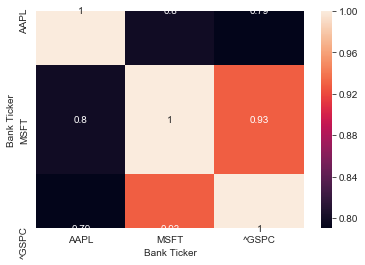

In [62]:
sns.heatmap(bank_stocks.xs(axis=1,key='Close',level='Stock Info').corr(),annot=True)

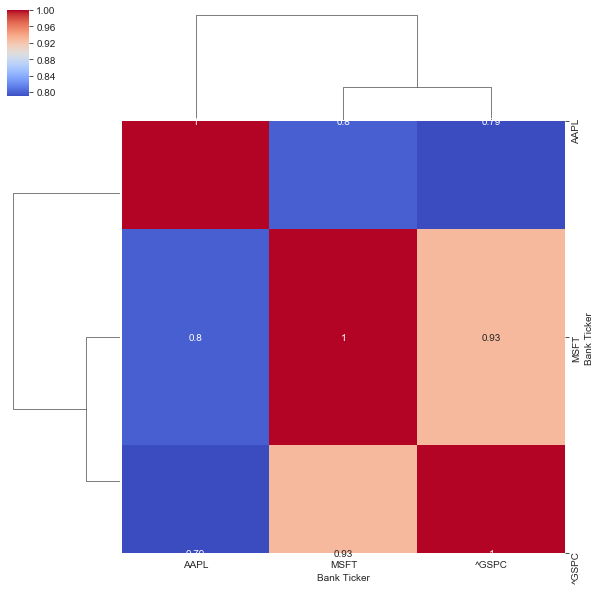

In [67]:
sns.clustermap(bank_stocks.xs(axis=1,key='Close',level='Stock Info').corr(),annot=True,cmap='coolwarm')

In [68]:
df2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,27.000000,26.10,26.250000,26.840000,79973000.0,19.777893
2006-01-04,27.080000,26.77,26.770000,26.969999,57975600.0,19.873684
2006-01-05,27.129999,26.91,26.959999,26.990000,48245500.0,19.888428
2006-01-06,27.000000,26.49,26.889999,26.910000,100963000.0,19.829477
2006-01-09,27.070000,26.76,26.930000,26.860001,55625000.0,19.792625


In [74]:
msft15 = df2[['High','Low','Open','Close']].loc['2015-01-01':'2016-01-01']

In [91]:
msft15.iplot(kind='candle')

In [90]:
df3['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

In [87]:
df3['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [89]:
df3['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')